<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-06-25 00:31:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  34.0MB/s    in 1.0s    

2024-06-25 00:31:52 (34.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [14]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Demo: How to run an sql query


In [50]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT DevType,sum(Respondent)
FROM DevType
group by Respondent
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,DevType,sum(Respondent)
0,"Developer, full-stack",4
1,Database administrator,54
2,Data or business analyst,169
3,"Developer, full-stack",16
4,"Developer, back-end",68


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [42]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM DatabaseDesireNextYear
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


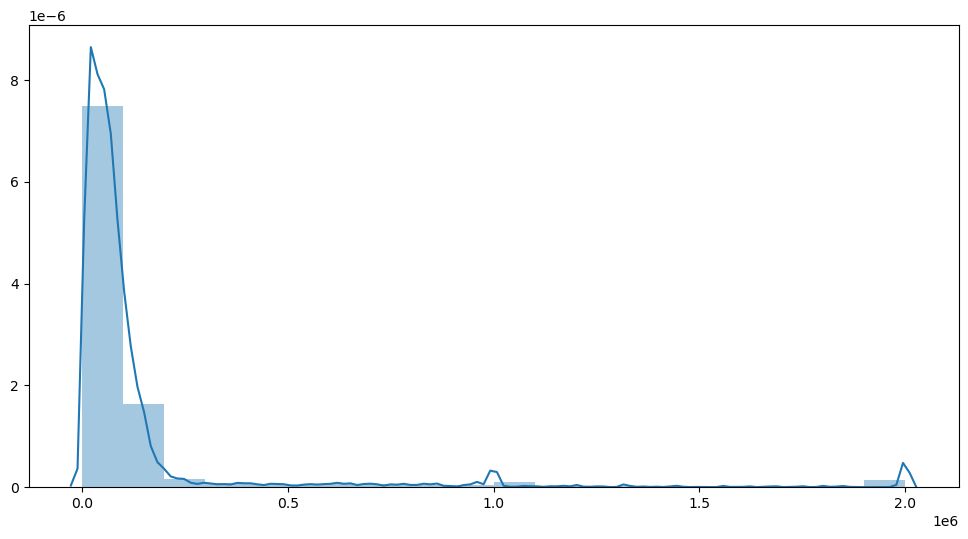

In [17]:
QUERY = """
SELECT ConvertedComp
FROM master
"""
convertedComp = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(12, 6))
sns.distplot(convertedComp, bins=20)
plt.show()


### Box Plots


Plot a box plot of `Age.`


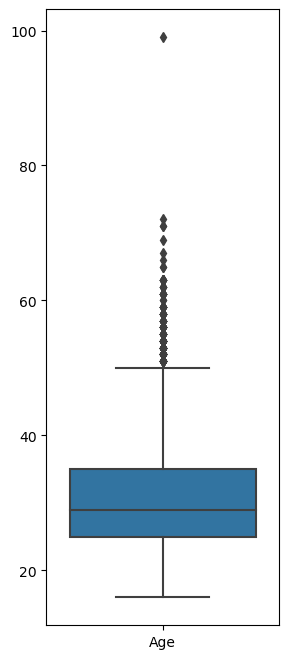

In [18]:

QUERY = """
SELECT Age
FROM master
"""
age = pd.read_sql_query(QUERY,conn)

plt.figure(figsize=(3, 8))
sns.boxplot(data=age)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


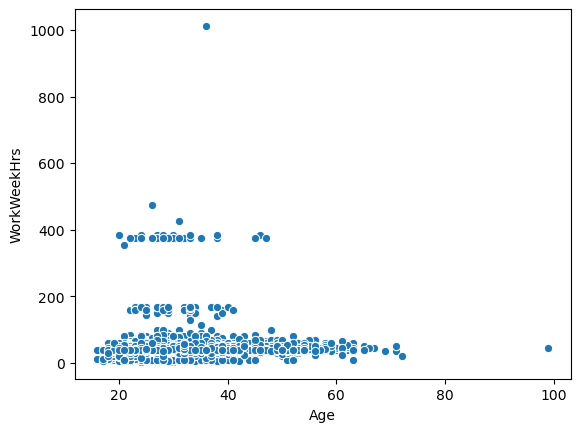

In [19]:
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
data = pd.read_sql_query(QUERY,conn)

# plt.figure(figsize=(3, 8))
sns.scatterplot(data=data, x="Age", y="WorkWeekHrs")
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


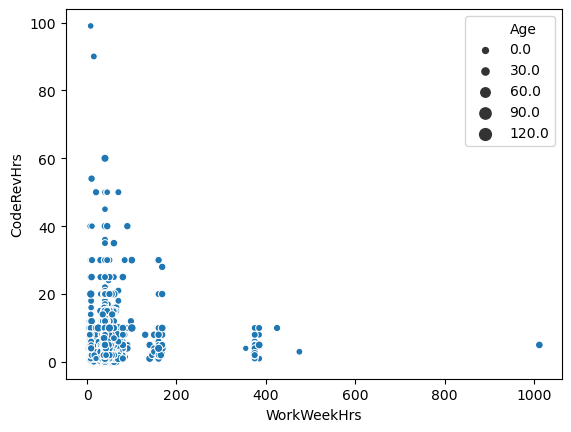

In [38]:
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
data = pd.read_sql_query(QUERY,conn)

# plt.figure(figsize=(3, 8))
sns.scatterplot(data=data, x="WorkWeekHrs", y="CodeRevHrs", size="Age")
plt.show()


In [40]:
df_numeric=data.select_dtypes(include=['float64','int64'])
correlaciones=df_numeric.corr()['Age'].sort_values()
print(correlaciones)


CodeRevHrs    -0.020498
WorkWeekHrs    0.036517
Age            1.000000
Name: Age, dtype: float64


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


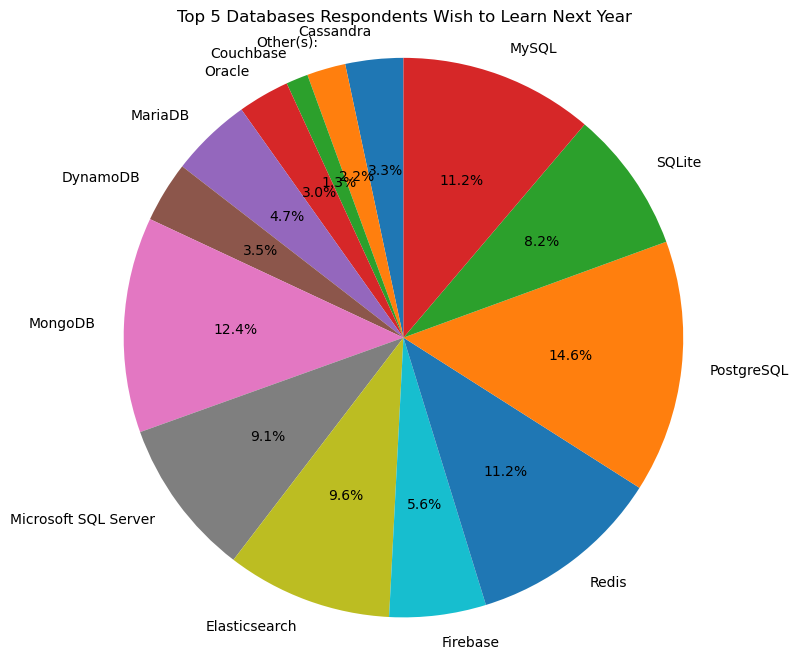

In [48]:
QUERY = """
SELECT DatabaseDesireNextYear, sum(Respondent) AS Total
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Respondent desc

"""

data = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 8))
plt.pie(data['Total'], labels=data['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal') 
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


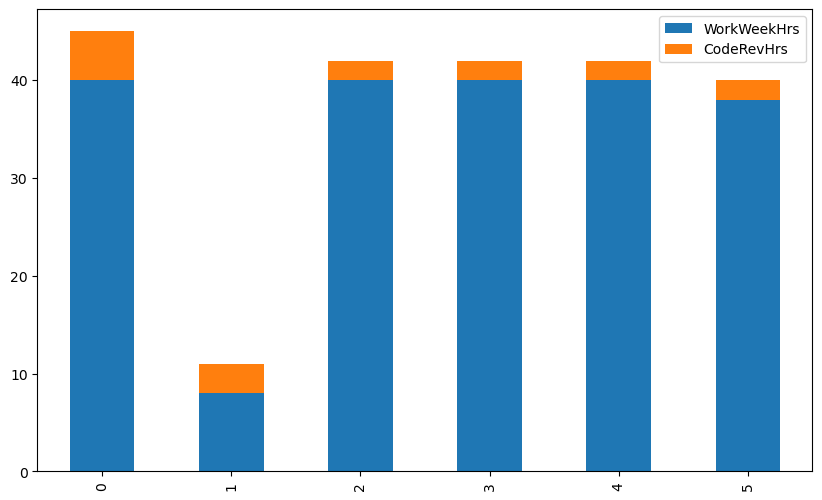

In [30]:
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
GROUP BY Age
"""
data = pd.read_sql_query(QUERY,conn)

data.plot(kind='bar', stacked=True, figsize=(10,6))
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


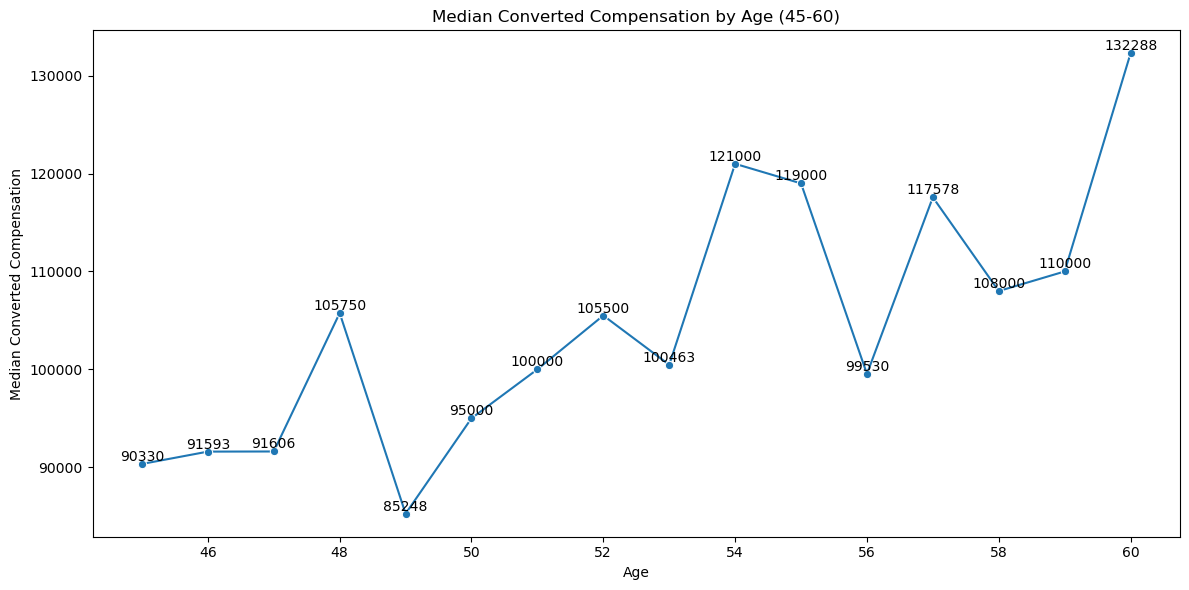

In [37]:
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60 AND ConvertedComp IS NOT NULL
"""
data = pd.read_sql_query(QUERY, conn)
median_comp = data.groupby('Age')['ConvertedComp'].median().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='ConvertedComp', data=median_comp, marker='o')
plt.title('Median Converted Compensation by Age (45-60)')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
for i, row in median_comp.iterrows():
    plt.text(row['Age'], row['ConvertedComp'], f'{row["ConvertedComp"]:.0f}', 
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


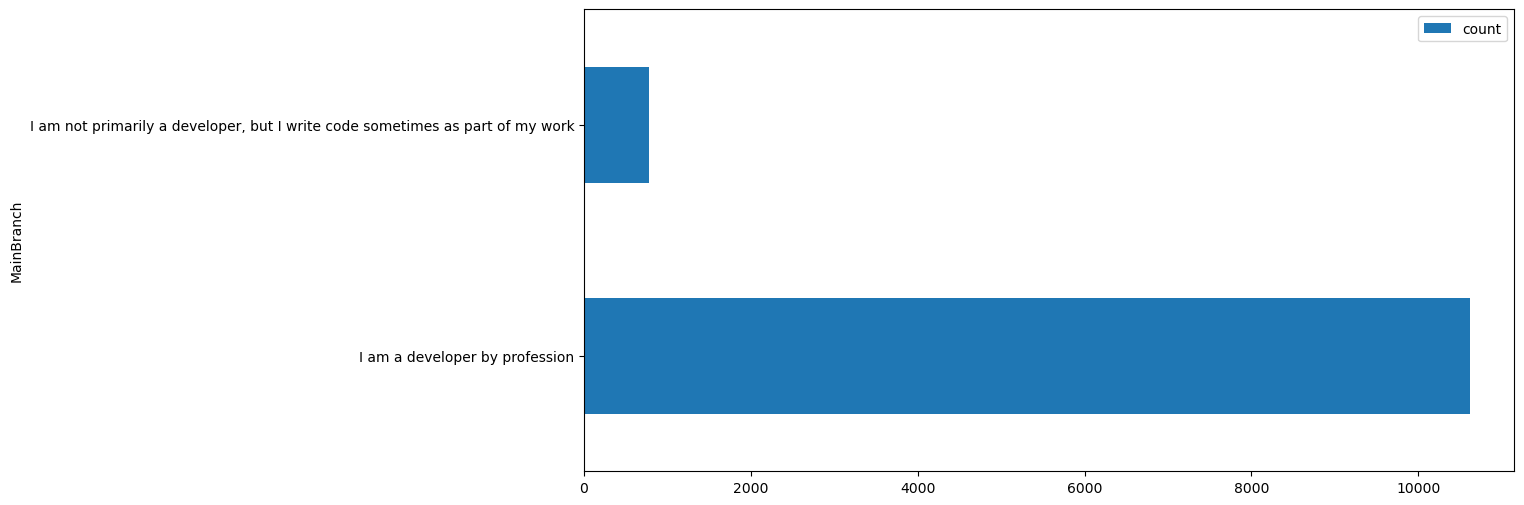

In [35]:
QUERY = """
SELECT MainBranch, COUNT(MainBranch) AS count
FROM master
GROUP BY MainBranch
"""

data = pd.read_sql_query(QUERY, conn)
mbranch = pd.DataFrame(data=data)
mbranch.set_index('MainBranch', inplace=True)
mbranch

mbranch.plot(kind="barh", figsize=(12,6))
plt.show()


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
